In [167]:
# modules
from glob import glob
import re
import os.path
from itertools import repeat
import csv
import numpy as np
import pandas as pd

# look at the following pre and post motion correction:
# dvars_std, dvars_vstd / Fwhm_avg / Gsr_x, Gsr_y / snr / tsnr / Fd_mean)

file='bold.csv'

#abide_compare = abide_csv[abide_csv.subject.isin(asubjs)].ix[:, ['subject', 'anat_cnr', 'func_mean_fd']].reset_index(drop=True)

categories = ['sub_array','dvars_std', 'dvars_vstd', 'fwhm_mean', 'gsr_x', 'gsr_y', 'snr', 'tsnr','fd_mean', 'hold', 'in_group']

sites = ['DOD'] #['EIB','Berlin','CBT','DOD']  #TASTI2, EIB also not done (need all conditions in txt file)
frames = [None] * len(sites)
temp_count = 0

for site in sites: 
    print(site)
    path='/om/group/saxelab/OpenAutism/data/'+site+'/mriqc_output/'
    with open(path+file) as tsv:
        sub_array = []
        value_array = []
        dvars_std = []
        dvars_vstd = []
        fwhm = []
        gsr_x = []
        gsr_y = []
        snr = []
        tsnr = []
        fd = []
        holdbox = []
        in_group = []
        hold = []
        counter = 0
        for line in csv.reader(tsv,  delimiter = ","):
            #print(line[0])
            counter = counter + 1
            if counter == 1:
                continue
            else:
                #print(line[0])
                sub_array.append(line[0])
                dvars_std.append(float(line[7]))
                dvars_vstd.append(float(line[8]))
                fwhm.append(float(line[14]))
                gsr_x.append(float(line[19]))
                gsr_y.append(float(line[20]))
                snr.append(float(line[25]))
                tsnr.append(float(line[47]))
                fd.append(float(line[11]))
                hold.append(1)
                holdbox.append(-1)
                if line[0] in open('ASD_group.txt').read():
                    with open('ASD_group.txt', "r") as myFile:
                        for num, tline in enumerate(myFile, 1):
                            if line[0] in tline:
                                if tline[-2] is "T":
                                    print(tline[-2])
                                    in_group.append("NT")
                                elif tline[-2] is "D":
                                    print(tline[-2])
                                    in_group.append("ASD")
                                else:
                                    print(tline[-2])
                                    print(line[0]+'!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
                                    in_group.append("empty")
                else:
                    in_group.append('empty')
                    print(line[0]+'!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')

    d = {'hold': hold, 'fd_mean': fd,'tsnr': tsnr,'snr': snr,'gsr_y': gsr_y,'gsr_x': gsr_x,'fwhm_mean': fwhm,'dvars_vstd': dvars_vstd,'dvars_std': dvars_std, 'Group': in_group, 'subject': sub_array, 'holdbox': holdbox}
    df = pd.DataFrame(data=d)

    frames[temp_count] = df
    temp_count = temp_count + 1
    
    #print("Only includes data contained in MRIQC bold.csv file.")
    #print(df)
    
result = pd.concat(frames)
#print(result)
print(result.shape)


DOD
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
(80, 12)


In [160]:
#y = result.mean()
#print(y)

NT = result['Group'] == "NT"
#print(NT)
NT = result[NT]
print("Number of NT runs: "+str(NT.shape[0]))
NT_mean = NT.mean()
print(NT_mean)

ASD = result['Group'] == "ASD"
ASD = result[ASD]
print("Number of ASD runs: "+str(ASD.shape[0]))
ASD_mean = ASD.mean()
print(ASD_mean)
#print(ASD)

empty = result['Group'] == "empty"

Number of NT runs: 340
dvars_std      1.211025
dvars_vstd     1.036672
fd_mean        0.254013
fwhm_mean      2.617463
gsr_x         -0.016708
gsr_y          0.082178
hold           1.000000
holdbox       -1.000000
snr            2.529186
tsnr          62.481240
dtype: float64
Number of ASD runs: 99
dvars_std      1.192844
dvars_vstd     1.054693
fd_mean        0.265924
fwhm_mean      2.543675
gsr_x         -0.010520
gsr_y          0.075912
hold           1.000000
holdbox       -1.000000
snr            3.080455
tsnr          56.664292
dtype: float64


['sub_array', 'dvars_std', 'dvars_vstd', 'fwhm_mean', 'gsr_x', 'gsr_y', 'snr', 'tsnr', 'fd_mean', 'hold', 'in_group']
dvars_std
dvars_vstd
fwhm_mean
gsr_x
gsr_y
snr
tsnr
fd_mean


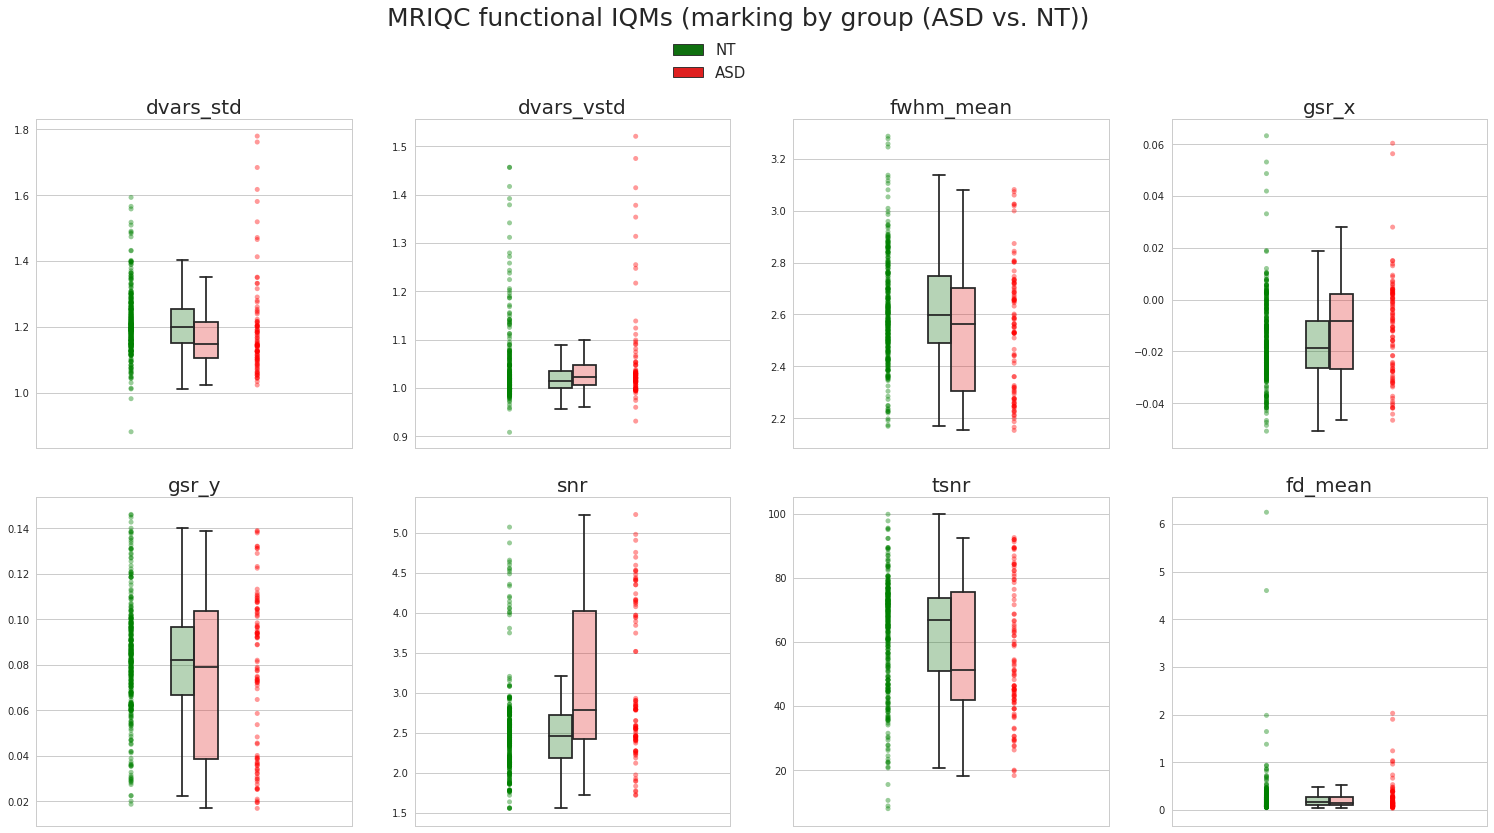

In [166]:
# plot the array in a boxplot
import matplotlib.pyplot as plt
import seaborn as sns

print(categories)

fig = plt.figure(figsize=(26,13))
ttl = fig.suptitle('MRIQC functional IQMs (marking by group (ASD vs. NT))', fontsize=25)
ttl.set_position([.5, 1])

#fig.set(title='MRIQC functional IQMs')
sel_pal = ['green','red', 'blue'] 

for i in range(1, 9):
    print(categories[i])
    sns.set(style="whitegrid")
    ax = plt.subplot(2, 4, i)
    #plt.text(0.005, 0.005, str((2, 3, i)),
             #fontsize=12, ha='center')       
        
    # make boxplot with Seaborn
    ax=sns.boxplot(x="holdbox",y=categories[i], hue="Group", data=result,width=0.15,
                     palette=sel_pal,showfliers=False)
    mybox = ax.artists[0]
    #mybox.set_facecolor('grey')
    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .3)) 

#     if site == 'Berlin':    
#         sel_pal = ['green','red']   
#     elif site == 'DOD':
#         sel_pal = ['green','red','yellow']  
#     elif site == 'CBT':
#         sel_pal = ['red','green']  
#     elif site == 'EIB':
#         sel_pal = ['green','red']  
#     elif site == 'TASTI2':
         
        
    # replace x with the IQMS
    ax = sns.stripplot(x="hold", y=categories[i], hue="Group", data=result,dodge = True, alpha = .4, palette = sel_pal) #palette=sns.color_palette("muted")) #palette="Set3")
    
    ax.axes.set_title(categories[i],fontsize=20)
    ax.set(xlabel="")
    ax.set(ylabel="")
    ax.set_xticklabels("")
    
    ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') 
        
    fig.subplots_adjust(hspace=.15, wspace=.2)

    if i == 4:
        #ax.legend(loc = 'best',prop={'size':14})
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles[0:2], labels[0:2],bbox_to_anchor=(-1.6, 1.25), loc=2, borderaxespad=0., prop={'size': 15})
    else:
        ax.legend([])
        
plt.savefig('./MRIQC_MotionCorr/Plots/MRIQC_bold_IQMs_ByGroup.png')